## Starting off

Define write down a definition for the following two terms:

Bias - 

Variance - 

# Understanding the Machine Learning Process

Agenda:

- Bias versus Variance
- Train Test Split
- Model Evaluation

## The Machine Learning Process

1. Look at the big picture. 
2. Get the data. 
3. Discover and visualize the data to gain insights. 
4. Prepare the data for Machine Learning algorithms. 
5. Select a model and train it. 
6. Fine-tune your model. 
7. Present your solution. 
8. Launch, monitor, and maintain your system.


**A proper machine learning workflow includes:**

* Separate training and test sets
* Trying appropriate algorithms (No Free Lunch)
* Fitting model parameters
* Tuning impactful hyperparameters
* Proper performance metrics
* Systematic cross-validation

# Bias - Variance 

There are 3 types of prediction error: bias, variance, and irreducible error.


**Total Error = Bias + Variance + Irreducible Error**

### The Bias-Variance Tradeoff


**Let's do a thought experiment:**

1. Imagine you've collected 5 different training sets for the same problem.
2. Now imagine using one algorithm to train 5 models, one for each of your training sets.
3. Bias vs. variance refers to the accuracy vs. consistency of the models trained by your algorithm.

<img src='Bias-vs.-Variance-v5-2-darts.png' width=500 />

**High bias** algorithms tend to be less complex, with simple or rigid underlying structure.

+ They train models that are consistent, but inaccurate on average.
+ These include linear or parametric algorithms such as regression and naive Bayes.

On the other hand, **high variance** algorithms tend to be more complex, with flexible underlying structure.

+ They train models that are accurate on average, but inconsistent.
+ These include non-linear or non-parametric algorithms such as decision trees and nearest neighbors.

### Bias-Variance Tradeoff

This tradeoff in complexity is why there's a tradeoff in bias and variance - an algorithm cannot simultaneously be more complex and less complex.

**Total Error = Bias^2 + Variance + Irreducible Error**


<img src='Bias-vs.-Variance-v4-chart.png' width=500 />

### Error from Bias

**Bias** is the difference between your model's expected predictions and the true values.

<img src='noisy-sine-linear.png' width=500 />

### Error from Variance

**Variance** refers to your algorithm's sensitivity to specific sets of training data.



<img src='noisy-sine-decision-tree.png' width=500/>

We want to try to find the proper balance of variance and bias

<img src='noisy-sine-third-order-polynomial.png' width=500 />


Which one is overfit and which one is underfit?

# Train Test Split

**How do we know if our model is overfitting or underfitting?**



Test our model on unseen data. 
Measure our performance on the unseen data.

The previous module introduced the idea of dividing your data set into two subsets:

* **training set** —a subset to train a model.
* **test set**—a subset to test the trained model.

You could imagine slicing the single data set as follows:

<img src='testtrainsplit.png' width =550 />

**Never train on test data.** If you are seeing surprisingly good results on your evaluation metrics, it might be a sign that you are accidentally training on the test set. 



<img src='https://developers.google.com/machine-learning/crash-course/images/WorkflowWithTestSet.svg' width=500/>

## Model Evaluation Metrics for Regression

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:



![alt text](mae.png)

**Mean Squared Error** (MSE) is the mean of the squared errors:

![alt text](mse.png)

**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:



![alt text](rmse.png)

MSE is more popular than MAE because MSE "punishes" larger errors. But, RMSE is even more popular than MSE because RMSE is interpretable in the "y" units.

# Practicum

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn import metrics


### Read in Kings County Housing Data Set


In [3]:
df = pd.read_csv('kc_house_data.csv',index_col='id')

### Take a look at the data

In [4]:
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113


In [40]:
df['yr_old']=2017 - df['yr_built']

### Identify my features and target variable

In [41]:
target = df.price
features = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade',
       'sqft_basement', 'yr_old']]

In [42]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_old'],
      dtype='object')

In [43]:
features.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_old
id,,,,,,,,,,
7129300520,3,1.00,1180,5650,1.0,0,3,7,0,62
6414100192,3,2.25,2570,7242,2.0,0,3,7,400,66
5631500400,2,1.00,770,10000,1.0,0,3,6,0,84
2487200875,4,3.00,1960,5000,1.0,0,5,7,910,52
1954400510,3,2.00,1680,8080,1.0,0,3,8,0,30
7237550310,4,4.50,5420,101930,1.0,0,3,11,1530,16
1321400060,3,2.25,1715,6819,2.0,0,3,7,0,22
2008000270,3,1.50,1060,9711,1.0,0,3,7,0,54
2414600126,3,1.00,1780,7470,1.0,0,3,7,730,57


### Some Quick Data exploration

In [44]:
features.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_old
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,3.409430,7.656873,291.509045,45.994864
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.650743,1.175459,442.575043,29.373411
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,0.000000,20.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,0.000000,42.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,4.000000,8.000000,560.000000,66.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,4820.000000,117.000000


### Create Train and Test Split

The random state variable makes it so you can always have the same 'random' split

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=34,test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(17290, 10) (17290,)
(4323, 10) (4323,)


In [46]:
# fit a model
from sklearn import datasets, linear_model


lm = linear_model.LinearRegression()
lm = lm.fit(X_train, y_train)
print(lm.intercept_)
print(lm.coef_)

-1073330.8312337236
[-3.63326362e+04  4.09074273e+04  1.58641566e+02 -1.70273290e-01
  3.31287511e+04  7.03080720e+05  1.94965639e+04  1.33594891e+05
  2.14901209e+01  3.69198897e+03]


### Residual Plotting

Let's lok at the residuals of the training set to see how they perform.

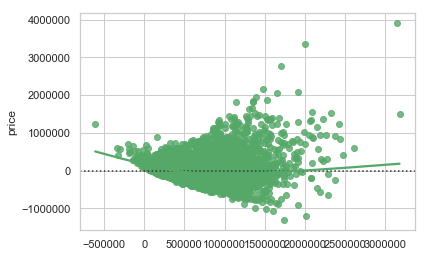

In [47]:

import numpy as np
import seaborn as sns
sns.set(style="whitegrid")

y_train_pred = lm.predict(X_train)

# Plot the residuals after fitting a linear model
sns.residplot(y_train_pred, y_train, lowess=True, color="g")

### How well did our model perform

In [48]:
print ("Score:", lm.score(X_train, y_train))


Score: 0.6455573743752124


In [49]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_train, y_train_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_train, y_train_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))

Mean Absolute Error:139254.18635103217
Mean Squared Error:44430411828.45894
Root Mean Squared Error:210785.2267794376


### Predicting the Test Set

In [50]:
y_pred = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

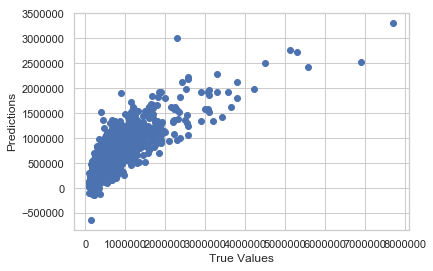

In [51]:
## The line / model
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

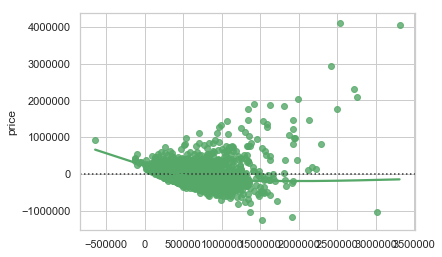

In [52]:
sns.residplot(y_pred, y_test, lowess=True, color="g")

In [53]:
print ("Score:", lm.score(X_test, y_test))


Score: 0.6429976258413044


In [54]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:143715.20044422447
Mean Squared Error:61547797042.71289
Root Mean Squared Error:248088.2847752245


### Comparing our Model's performance on training data versus test data.

In [55]:
print(train_mae, test_mae)

139254.18635103217 143715.20044422447


In [56]:
print(train_rmse, test_rmse)

210785.2267794376 248088.2847752245


### Let's try with more features

In [18]:
df_features = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade']]

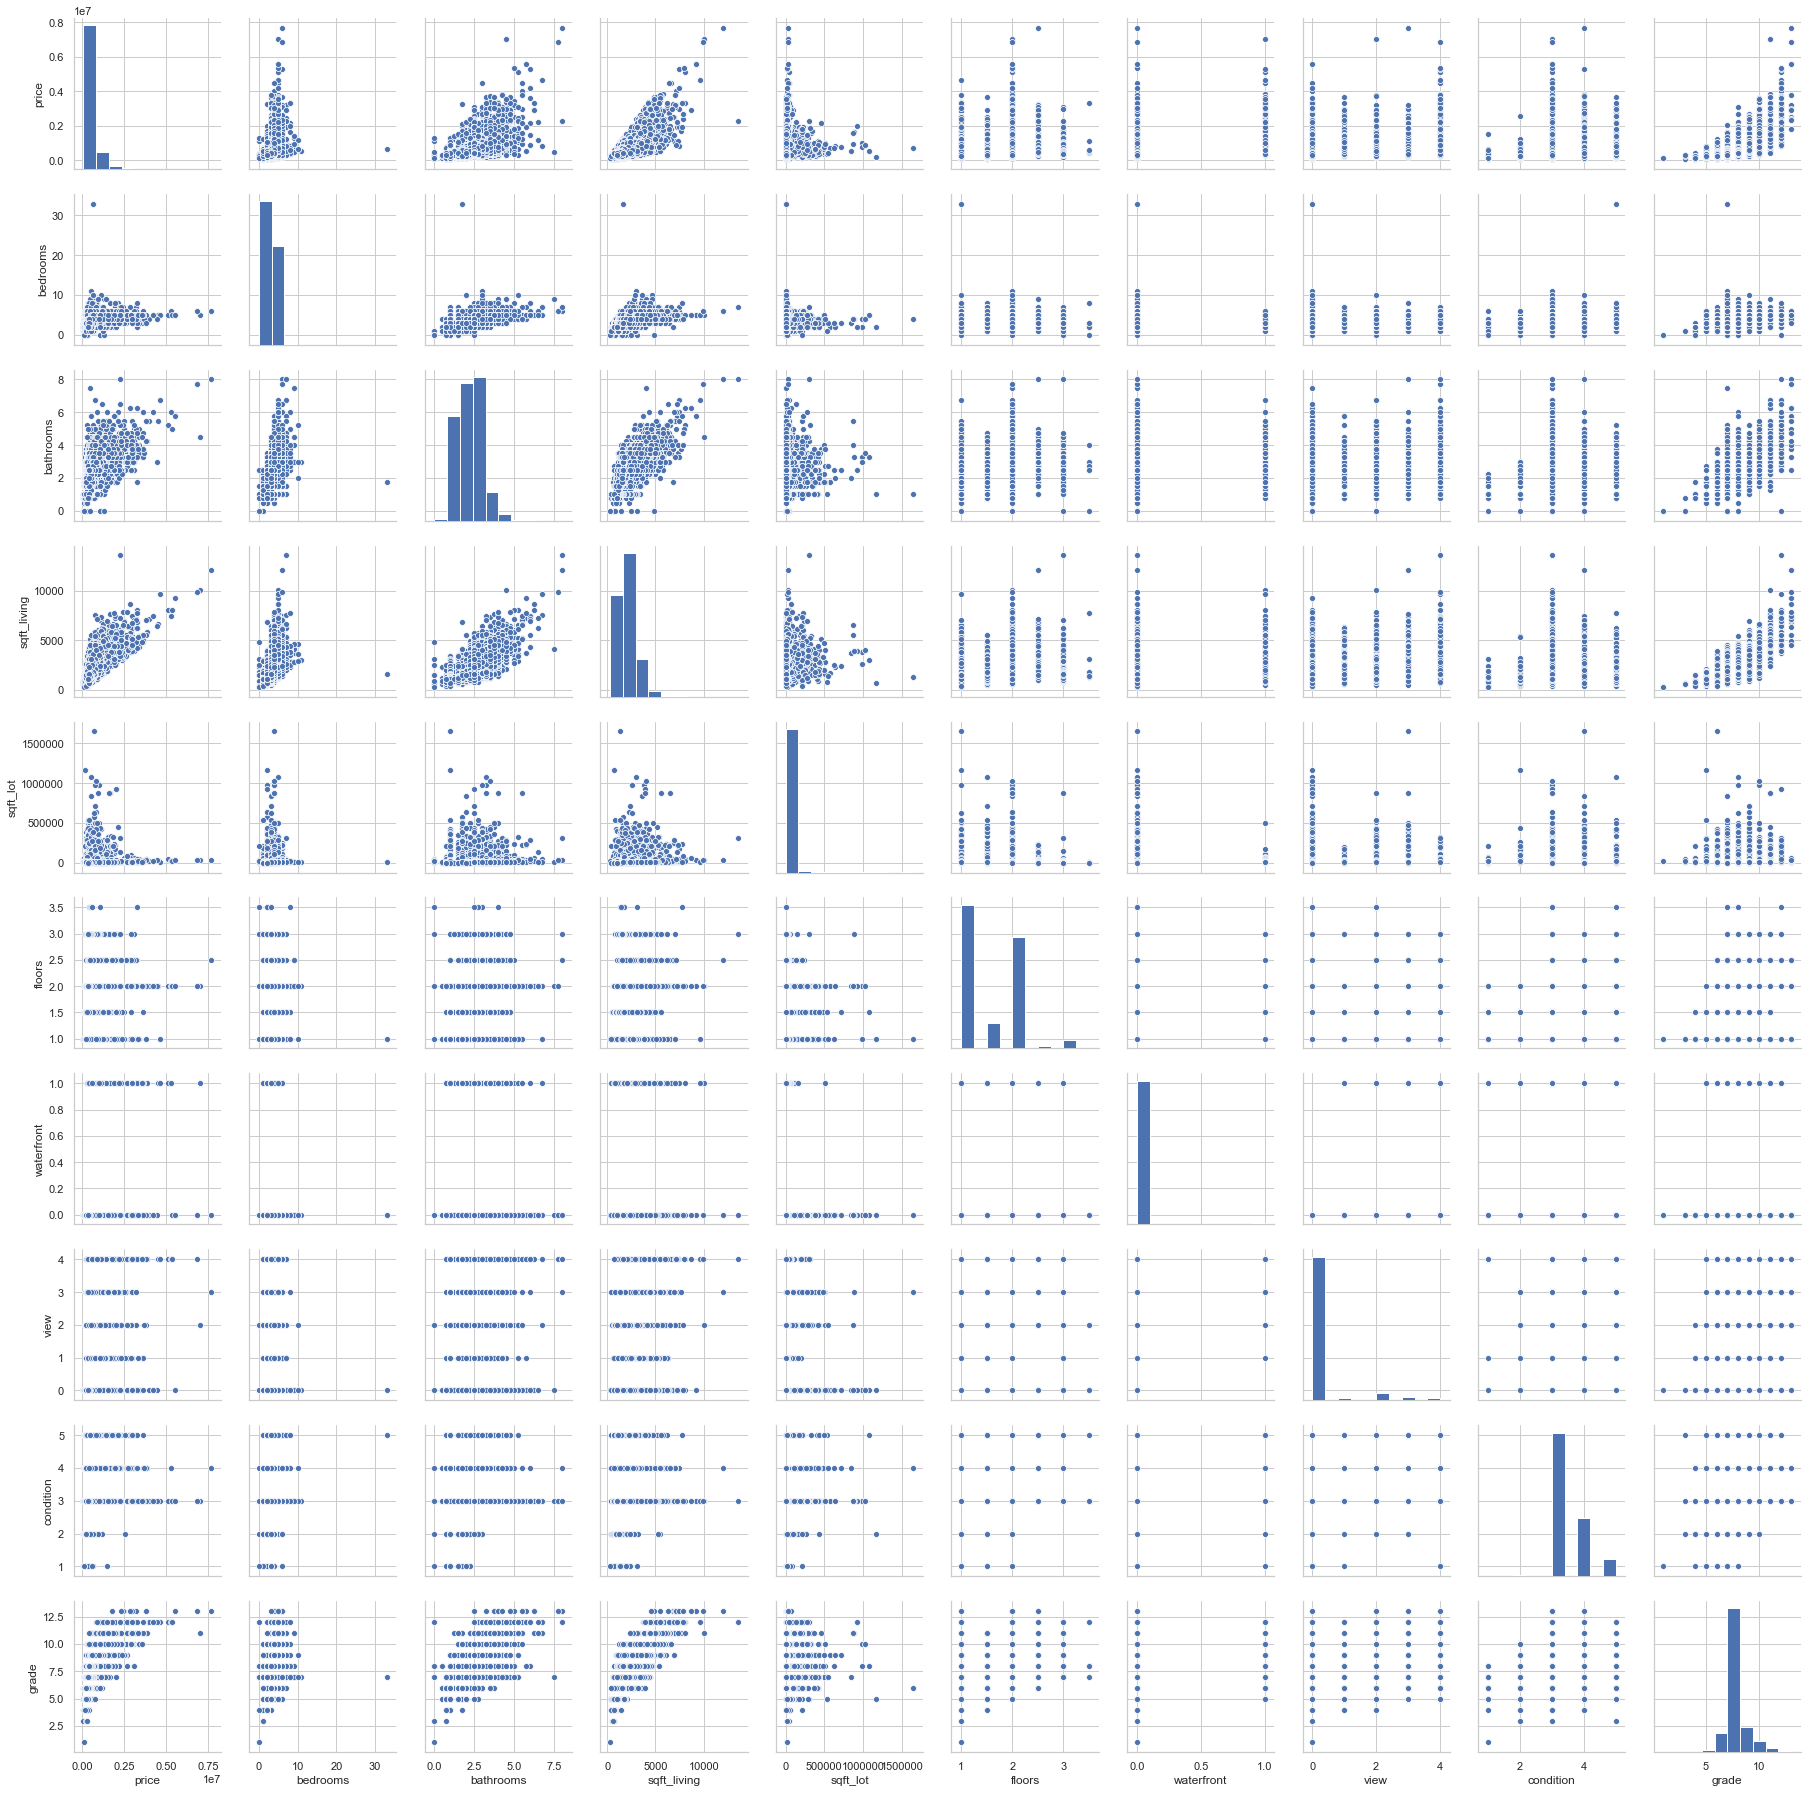

In [19]:
sns.pairplot(df_features)

In [57]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit_transform(features)
print(poly.get_feature_names(features.columns))


['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'sqft_basement', 'yr_old', 'bedrooms^2', 'bedrooms bathrooms', 'bedrooms sqft_living', 'bedrooms sqft_lot', 'bedrooms floors', 'bedrooms waterfront', 'bedrooms condition', 'bedrooms grade', 'bedrooms sqft_basement', 'bedrooms yr_old', 'bathrooms^2', 'bathrooms sqft_living', 'bathrooms sqft_lot', 'bathrooms floors', 'bathrooms waterfront', 'bathrooms condition', 'bathrooms grade', 'bathrooms sqft_basement', 'bathrooms yr_old', 'sqft_living^2', 'sqft_living sqft_lot', 'sqft_living floors', 'sqft_living waterfront', 'sqft_living condition', 'sqft_living grade', 'sqft_living sqft_basement', 'sqft_living yr_old', 'sqft_lot^2', 'sqft_lot floors', 'sqft_lot waterfront', 'sqft_lot condition', 'sqft_lot grade', 'sqft_lot sqft_basement', 'sqft_lot yr_old', 'floors^2', 'floors waterfront', 'floors condition', 'floors grade', 'floors sqft_basement', 'floors yr_old', 'waterfront^2', 'waterfront condit

In [58]:
pd.set_option('display.max_columns', 300)


In [59]:
df_poly= pd.DataFrame(poly.transform(features), columns=poly.get_feature_names(features.columns))
df_poly.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_old,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms sqft_lot,bedrooms floors,bedrooms waterfront,bedrooms condition,bedrooms grade,bedrooms sqft_basement,bedrooms yr_old,bathrooms^2,bathrooms sqft_living,bathrooms sqft_lot,bathrooms floors,bathrooms waterfront,bathrooms condition,bathrooms grade,bathrooms sqft_basement,bathrooms yr_old,sqft_living^2,sqft_living sqft_lot,sqft_living floors,sqft_living waterfront,sqft_living condition,sqft_living grade,sqft_living sqft_basement,sqft_living yr_old,sqft_lot^2,sqft_lot floors,sqft_lot waterfront,sqft_lot condition,sqft_lot grade,sqft_lot sqft_basement,sqft_lot yr_old,floors^2,floors waterfront,floors condition,floors grade,floors sqft_basement,floors yr_old,waterfront^2,waterfront condition,waterfront grade,waterfront sqft_basement,waterfront yr_old,condition^2,condition grade,condition sqft_basement,condition yr_old,grade^2,grade sqft_basement,grade yr_old,sqft_basement^2,sqft_basement yr_old,yr_old^2,bedrooms^3,bedrooms^2 bathrooms,bedrooms^2 sqft_living,bedrooms^2 sqft_lot,bedrooms^2 floors,bedrooms^2 waterfront,bedrooms^2 condition,bedrooms^2 grade,bedrooms^2 sqft_basement,bedrooms^2 yr_old,bedrooms bathrooms^2,bedrooms bathrooms sqft_living,bedrooms bathrooms sqft_lot,bedrooms bathrooms floors,bedrooms bathrooms waterfront,bedrooms bathrooms condition,bedrooms bathrooms grade,bedrooms bathrooms sqft_basement,bedrooms bathrooms yr_old,bedrooms sqft_living^2,bedrooms sqft_living sqft_lot,bedrooms sqft_living floors,bedrooms sqft_living waterfront,bedrooms sqft_living condition,bedrooms sqft_living grade,bedrooms sqft_living sqft_basement,bedrooms sqft_living yr_old,bedrooms sqft_lot^2,bedrooms sqft_lot floors,bedrooms sqft_lot waterfront,bedrooms sqft_lot condition,bedrooms sqft_lot grade,bedrooms sqft_lot sqft_basement,bedrooms sqft_lot yr_old,bedrooms floors^2,bedrooms floors waterfront,bedrooms floors condition,bedrooms floors grade,bedrooms floors sqft_basement,bedrooms floors yr_old,bedrooms waterfront^2,bedrooms waterfront condition,bedrooms waterfront grade,bedrooms waterfront sqft_basement,bedrooms waterfront yr_old,bedrooms condition^2,bedrooms condition grade,bedrooms condition sqft_basement,bedrooms condition yr_old,bedrooms grade^2,bedrooms grade sqft_basement,bedrooms grade yr_old,bedrooms sqft_basement^2,bedrooms sqft_basement yr_old,bedrooms yr_old^2,bathrooms^3,bathrooms^2 sqft_living,bathrooms^2 sqft_lot,bathrooms^2 floors,bathrooms^2 waterfront,bathrooms^2 condition,bathrooms^2 grade,bathrooms^2 sqft_basement,bathrooms^2 yr_old,bathrooms sqft_living^2,bathrooms sqft_living sqft_lot,bathrooms sqft_living floors,bathrooms sqft_living waterfront,bathrooms sqft_living condition,bathrooms sqft_living grade,bathrooms sqft_living sqft_basement,bathrooms sqft_living yr_old,bathrooms sqft_lot^2,bathrooms sqft_lot floors,bathrooms sqft_lot waterfront,bathrooms sqft_lot condition,bathrooms sqft_lot grade,bathrooms sqft_lot sqft_basement,bathrooms sqft_lot yr_old,bathrooms floors^2,bathrooms floors waterfront,bathrooms floors condition,bathrooms floors grade,bathrooms floors sqft_basement,bathrooms floors yr_old,bathrooms waterfront^2,bathrooms waterfront condition,bathrooms waterfront grade,bathrooms waterfront sqft_basement,bathrooms waterfront yr_old,bathrooms condition^2,bathrooms condition grade,bathrooms condition sqft_basement,bathrooms condition yr_old,bathrooms grade^2,bathrooms grade sqft_basement,bathrooms grade yr_old,bathrooms sqft_basement^2,bathrooms sqft_basement yr_old,bathrooms yr_old^2,sqft_living^3,sqft_living^2 sqft_lot,sqft_living^2 floors,sqft_living^2 waterfront,sqft_living^2 condition,sqft_living^2 grade,sqft_living^2 sqft_basement,sqft_living^2 yr_old,sqft_living sqft_lot^2,sqft_living sqft_lot floors,sqft_living sqft_lot waterfront,sqft_living sqft_lot condition,sqft_living sqft_lot grade,sqft_living sqft_lot sqft_basement,sqft_living sqft_lot 

In [60]:
df_poly.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_old,bedrooms^2,bedrooms bathrooms,bedrooms sqft_living,bedrooms sqft_lot,bedrooms floors,bedrooms waterfront,bedrooms condition,bedrooms grade,bedrooms sqft_basement,bedrooms yr_old,bathrooms^2,bathrooms sqft_living,bathrooms sqft_lot,bathrooms floors,bathrooms waterfront,bathrooms condition,bathrooms grade,bathrooms sqft_basement,bathrooms yr_old,sqft_living^2,sqft_living sqft_lot,sqft_living floors,sqft_living waterfront,sqft_living condition,sqft_living grade,sqft_living sqft_basement,sqft_living yr_old,sqft_lot^2,sqft_lot floors,sqft_lot waterfront,sqft_lot condition,sqft_lot grade,sqft_lot sqft_basement,sqft_lot yr_old,floors^2,floors waterfront,floors condition,floors grade,floors sqft_basement,floors yr_old,waterfront^2,waterfront condition,waterfront grade,waterfront sqft_basement,waterfront yr_old,condition^2,condition grade,condition sqft_basement,condition yr_old,grade^2,grade sqft_basement,grade yr_old,sqft_basement^2,sqft_basement yr_old,yr_old^2,bedrooms^3,bedrooms^2 bathrooms,bedrooms^2 sqft_living,bedrooms^2 sqft_lot,bedrooms^2 floors,bedrooms^2 waterfront,bedrooms^2 condition,bedrooms^2 grade,bedrooms^2 sqft_basement,bedrooms^2 yr_old,bedrooms bathrooms^2,bedrooms bathrooms sqft_living,bedrooms bathrooms sqft_lot,bedrooms bathrooms floors,bedrooms bathrooms waterfront,bedrooms bathrooms condition,bedrooms bathrooms grade,bedrooms bathrooms sqft_basement,bedrooms bathrooms yr_old,bedrooms sqft_living^2,bedrooms sqft_living sqft_lot,bedrooms sqft_living floors,bedrooms sqft_living waterfront,bedrooms sqft_living condition,bedrooms sqft_living grade,bedrooms sqft_living sqft_basement,bedrooms sqft_living yr_old,bedrooms sqft_lot^2,bedrooms sqft_lot floors,bedrooms sqft_lot waterfront,bedrooms sqft_lot condition,bedrooms sqft_lot grade,bedrooms sqft_lot sqft_basement,bedrooms sqft_lot yr_old,bedrooms floors^2,bedrooms floors waterfront,bedrooms floors condition,bedrooms floors grade,bedrooms floors sqft_basement,bedrooms floors yr_old,bedrooms waterfront^2,bedrooms waterfront condition,bedrooms waterfront grade,bedrooms waterfront sqft_basement,bedrooms waterfront yr_old,bedrooms condition^2,bedrooms condition grade,bedrooms condition sqft_basement,bedrooms condition yr_old,bedrooms grade^2,bedrooms grade sqft_basement,bedrooms grade yr_old,bedrooms sqft_basement^2,bedrooms sqft_basement yr_old,bedrooms yr_old^2,bathrooms^3,bathrooms^2 sqft_living,bathrooms^2 sqft_lot,bathrooms^2 floors,bathrooms^2 waterfront,bathrooms^2 condition,bathrooms^2 grade,bathrooms^2 sqft_basement,bathrooms^2 yr_old,bathrooms sqft_living^2,bathrooms sqft_living sqft_lot,bathrooms sqft_living floors,bathrooms sqft_living waterfront,bathrooms sqft_living condition,bathrooms sqft_living grade,bathrooms sqft_living sqft_basement,bathrooms sqft_living yr_old,bathrooms sqft_lot^2,bathrooms sqft_lot floors,bathrooms sqft_lot waterfront,bathrooms sqft_lot condition,bathrooms sqft_lot grade,bathrooms sqft_lot sqft_basement,bathrooms sqft_lot yr_old,bathrooms floors^2,bathrooms floors waterfront,bathrooms floors condition,bathrooms floors grade,bathrooms floors sqft_basement,bathrooms floors yr_old,bathrooms waterfront^2,bathrooms waterfront condition,bathrooms waterfront grade,bathrooms waterfront sqft_basement,bathrooms waterfront yr_old,bathrooms condition^2,bathrooms condition grade,bathrooms condition sqft_basement,bathrooms condition yr_old,bathrooms grade^2,bathrooms grade sqft_basement,bathrooms grade yr_old,bathrooms sqft_basement^2,bathrooms sqft_basement yr_old,bathrooms yr_old^2,sqft_living^3,sqft_living^2 sqft_lot,sqft_living^2 floors,sqft_living^2 waterfront,sqft_living^2 condition,sqft_living^2 grade,sqft_living^2 sqft_basement,sqft_living^2 yr_old,sqft_living sqft_lot^2,sqft_living sqft_lot floors,sqft_living sqft_lot waterfront,sqft_living sqft_lot condition,sqft_living sqft_lot grade,sqft_living sqft_lot sqft_basement,sqft_living sqft_lot 

In [62]:

X_train3, X_test3, y_train3, y_test3 = train_test_split(df_poly, target, random_state=34,test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17290, 285) (17290,)
(4323, 285) (4323,)


In [63]:
# fit a model
lm3 = linear_model.LinearRegression()
lm3 = lm.fit(X_train3, y_train3)


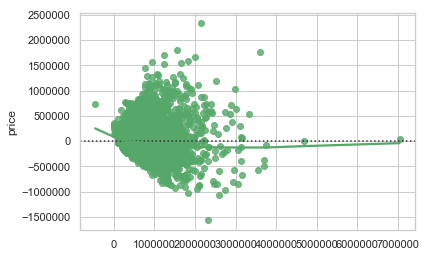

In [64]:
y_train_pred3 = lm3.predict(X_train3)

# Plot the residuals after fitting a linear model
sns.residplot(y_train_pred3, y_train3, lowess=True, color="g")

In [67]:

train_mae3 = metrics.mean_absolute_error(y_train3, y_train_pred3)

print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_train3, y_train_pred3)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_train3, y_train_pred3)))
print('SqRt of Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_train3, y_train_pred3))))

Mean Absolute Error:125470.04598938805
Mean Squared Error:34127326485.658974
SqRt of Mean Squared Error:184735.82891702134


In [68]:
y_pred3 = lm.predict(X_test3)

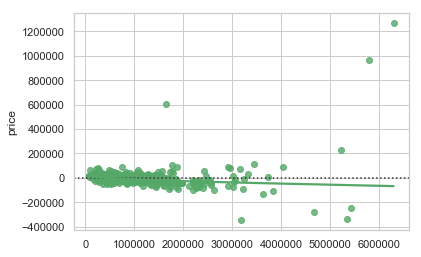

In [29]:
sns.residplot(y_pred3, y_test3, lowess=True, color="g")

In [69]:
test_mae3 = metrics.mean_absolute_error(y_test3, y_pred3)
print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test3, y_pred3)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test3, y_pred3)))
print('SqRt of Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test3, y_pred3))))

Mean Absolute Error:131263.73221136114
Mean Squared Error:47527382715.48682
SqRt of Mean Squared Error:218007.75838370252


### Training Error vs Test Error

In [70]:
print(train_mae3, test_mae3)

125470.04598938805 131263.73221136114


In [71]:
print ("Score:", lm3.score(X_train3, y_train3))
print ("Test Score:", lm3.score(X_test3, y_test3))


Score: 0.7277500093441992
Test Score: 0.7243217583368138


In [73]:
poly_2 = PolynomialFeatures(degree=2)
poly_2.fit_transform(features)
df_poly_2= pd.DataFrame(poly_2.transform(features), columns=poly_2.get_feature_names(features.columns))


X2_train, X2_test, y2_train, y2_test = train_test_split(df_poly_2, target, random_state=34,test_size=0.2)
print(X2_train.shape, y2_train.shape)
print(X2_test.shape, y2_test.shape)

lm2 = linear_model.LinearRegression()
model2 = lm2.fit(X2_train, y2_train)
y2_train_pred = lm2.predict(X2_train)

# Plot the residuals after fitting a linear model
# sns.residplot(y2_train_pred, y2_train, lowess=True, color="g")

train2_mae = metrics.mean_absolute_error(y2_train, y2_train_pred)


y2_pred = lm2.predict(X2_test)
# sns.residplot(y2_pred, y2_test, lowess=True, color="g")

test2_mae = metrics.mean_absolute_error(y2_test, y2_pred)

print(train2_mae, test2_mae)


(17290, 66) (17290,)
(4323, 66) (4323,)
127584.06003076711 130097.93086286107


In [ ]:
https://elitedatascience.com/bias-variance-tradeoff